In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
data['text'] = data['text'].str.upper()

In [4]:
data['text'] = data['text'].str.replace(r"&AMP", ' ', regex=True)
data['text'] = data['text'].str.replace(r"&GT", ' ', regex=True)
data['text'] = data['text'].str.replace(r"@+", '', regex=True)
data['text'] = data['text'].str.replace("?", '? ')
data['text'] = data['text'].str.replace("!", '! ')
data['text'] = data['text'].str.replace(r"HTTP\S+", '', regex=True)
data['text'] = data['text'].str.replace(r"[^A-Z0-9 ]", ' ', regex=True)
data['text'] = data['text'].str.replace(r"\d+(?=[A-Z])", '', regex=True)
data['text'] = data['text'].str.replace("Á", 'A', regex=True)
data['text'] = data['text'].str.replace("É", 'E', regex=True)
data['text'] = data['text'].str.replace("Í", 'I', regex=True)
data['text'] = data['text'].str.replace("Ó", 'O', regex=True)
data['text'] = data['text'].str.replace("Ú", 'U', regex=True)
data['text'] = data['text'].str.replace(r" +", ' ', regex=True)

In [5]:
data['location'] = data['location'].str.upper()

In [6]:
data['location'] = data['location'].str.replace(r"[^A-Z0-9 ]", '', regex=True)
data['location'] = data['location'].str.replace(r" +", ' ', regex=True)
data['location'] = data['location'].replace(" ", np.nan)

In [7]:
data['keyword'] = data['keyword'].str.upper()
data['keyword'] = data['keyword'].str.replace("%20", ' ', regex=True)

In [8]:
for tweet in data:
    print(tweet)

id
keyword
location
text
target


In [9]:
disaster_tweets = data[data['target'] == 1]['text'].tolist()
non_disaster_tweets = data[data['target'] == 0]['text'].tolist()

In [10]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darielvr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/darielvr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/darielvr/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('english'))

def get_word_freq(tweets):
    words = []
    for tweet in tweets:
        words.extend([word.lower() for word in word_tokenize(tweet) if word.isalnum() and word.lower() not in stop_words])
    return FreqDist(words)

# Assuming disaster_tweets and non_disaster_tweets are defined
disaster_freq = get_word_freq(disaster_tweets)
non_disaster_freq = get_word_freq(non_disaster_tweets)

In [12]:
disaster_common = disaster_freq.most_common(20)
non_disaster_common = non_disaster_freq.most_common(20)

print("Palabras más comunes en tweets de desastres:")
print(disaster_common)
print("\nPalabras más comunes en tweets que no son de desastres:")
print(non_disaster_common)

Palabras más comunes en tweets de desastres:
[('fire', 182), ('news', 144), ('disaster', 121), ('via', 121), ('california', 115), ('suicide', 112), ('police', 109), ('people', 105), ('2', 102), ('killed', 95), ('like', 94), ('hiroshima', 92), ('storm', 89), ('fires', 86), ('pm', 86), ('crash', 85), ('families', 81), ('train', 79), ('emergency', 77), ('bomb', 76)]

Palabras más comunes en tweets que no son de desastres:
[('like', 254), ('new', 171), ('get', 163), ('one', 133), ('body', 116), ('2', 114), ('would', 101), ('via', 99), ('video', 96), ('people', 95), ('got', 94), ('love', 91), ('day', 86), ('know', 86), ('time', 85), ('back', 85), ('3', 84), ('full', 84), ('see', 82), ('emergency', 81)]


In [13]:
from nltk import bigrams, trigrams

def get_ngram_freq(tweets, n):
    ngrams = []
    for tweet in tweets:
        tokens = [word.lower() for word in word_tokenize(tweet) if word.isalnum() and word.lower() not in stop_words]
        if n == 2:
            ngrams.extend(list(bigrams(tokens)))
        elif n == 3:
            ngrams.extend(list(trigrams(tokens)))
    return FreqDist(ngrams)

disaster_bigrams = get_ngram_freq(disaster_tweets, 2)
disaster_trigrams = get_ngram_freq(disaster_tweets, 3)

print("\nBigramas más comunes en tweets de desastres:")
print(disaster_bigrams.most_common(10))
print("\nTrigramas más comunes en tweets de desastres:")
print(disaster_trigrams.most_common(10))


Bigramas más comunes en tweets de desastres:
[(('suicide', 'bomber'), 59), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('burning', 'buildings'), 36), (('suicide', 'bombing'), 35), (('california', 'wildfire'), 34), (('70', 'years'), 30), (('bomber', 'detonated'), 30), (('confirmed', 'mh370'), 29), (('yr', 'old'), 29)]

Trigramas más comunes en tweets de desastres:
[(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('yr', 'old', 'pkk'), 27), (('old', 'pkk', 'suicide'), 27), (('families', 'sue', 'legionnaires'), 26)]


In [14]:
# Combine disaster and non-disaster frequencies into a single dataframe
disaster_freq_df = pd.DataFrame(disaster_freq.most_common(20), columns=['word', 'frequency'])
disaster_freq_df['type'] = 'disaster'
non_disaster_freq_df = pd.DataFrame(non_disaster_freq.most_common(20), columns=['word', 'frequency'])
non_disaster_freq_df['type'] = 'non_disaster'
combined_freq_df = pd.concat([disaster_freq_df, non_disaster_freq_df])
combined_freq_df.reset_index(drop=True, inplace=True)
combined_freq_df.sort_values('frequency', ascending=False, inplace=True)
combined_freq_df.head(10)

,word,frequency,type
20,like,254,non_disaster
0,fire,182,disaster
21,new,171,non_disaster
22,get,163,non_disaster
1,news,144,disaster
23,one,133,non_disaster
3,via,121,disaster
2,disaster,121,disaster
24,body,116,non_disaster
4,california,115,disaster


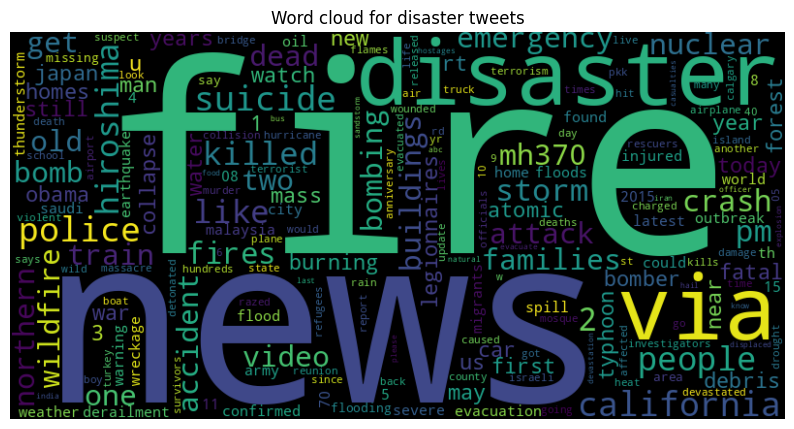

In [15]:
# Word cloud for disaster tweets
from wordcloud import WordCloud

disaster_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(disaster_freq)
plt.figure(figsize=(10, 6))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for disaster tweets')
plt.show()

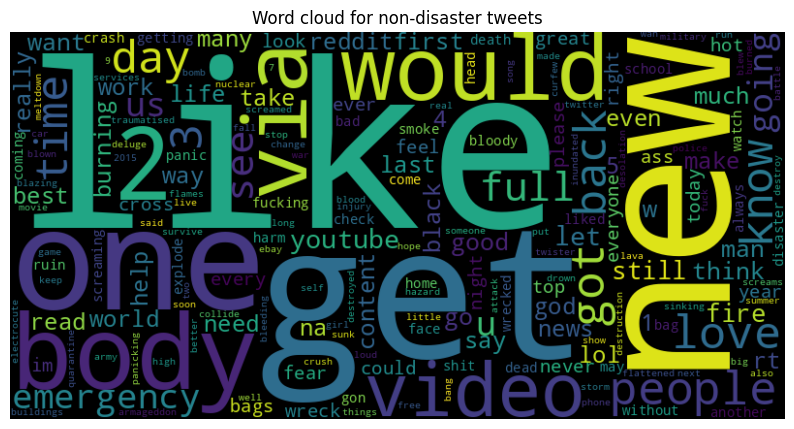

In [16]:
# Word cloud for non-disaster tweets
non_disaster_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(non_disaster_freq)
plt.figure(figsize=(10, 6))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for non-disaster tweets')
plt.show()

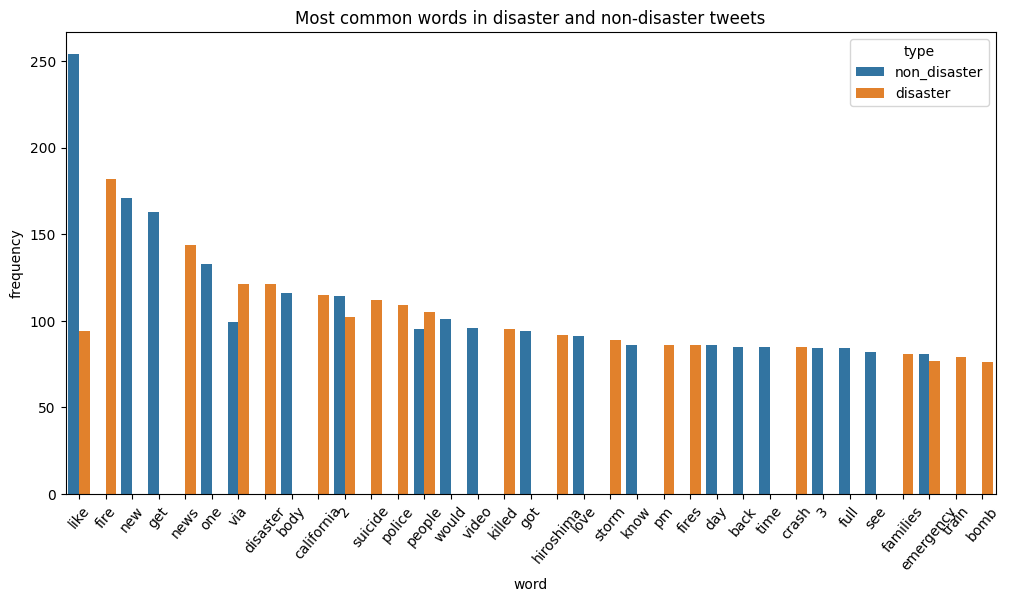

In [17]:
# Most common words in disaster and non-disaster tweets histogram
plt.figure(figsize=(12, 6))
sb.barplot(x='word', y='frequency', hue='type', data=combined_freq_df)
plt.title('Most common words in disaster and non-disaster tweets')
plt.xticks(rotation=50)
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras.layers

2024-09-01 14:39:01.845314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 14:39:01.848682: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 14:39:01.856913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 14:39:01.873905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 14:39:01.878838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 14:39:01.891319: I tensorflow/core/platform/cpu_feature_gu

In [19]:

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
word_index = tokenizer.word_index

# Pad the sequences
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, padding='post')

# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data['target'], test_size=0.2, random_state=42)

In [45]:
model1 = keras.Sequential()
model1.add(keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=padded_sequences.shape[1]))
model1.add(keras.layers.LSTM(64, dropout=0.4))
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
history1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5637 - loss: 0.6821 - val_accuracy: 0.7564 - val_loss: 0.5920
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7901 - loss: 0.5203 - val_accuracy: 0.7965 - val_loss: 0.4659
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8790 - loss: 0.3201 - val_accuracy: 0.7905 - val_loss: 0.4557
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9311 - loss: 0.2053 - val_accuracy: 0.7984 - val_loss: 0.5603
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9544 - loss: 0.1465 - val_accuracy: 0.7899 - val_loss: 0.5578
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9641 - loss: 0.1189 - val_accuracy: 0.7544 - val_loss: 0.6795
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9700 - loss: 0.0964 - val_accuracy: 0.7702 - val_loss: 0.7170
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9702 - loss: 0.0791 - val_accu

In [47]:
loss, accuracy = model1.evaluate(X_val, y_val)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.8148


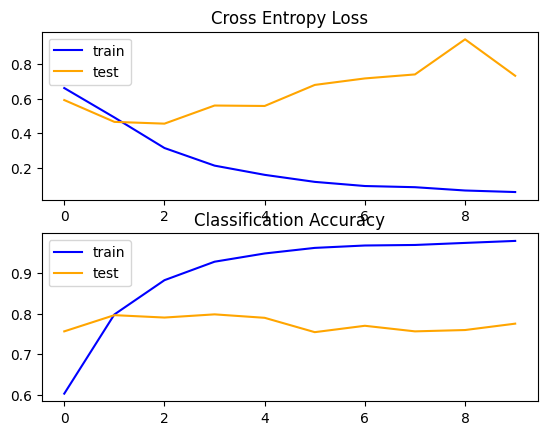

In [48]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='orange', label='test')
plt.legend()
 # plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='orange', label='test')
plt.legend()

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [51]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_val, y_pred))

Accuracy: 0.6789231779382797
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       874
           1       0.69      0.45      0.55       649

    accuracy                           0.68      1523
   macro avg       0.68      0.65      0.65      1523
weighted avg       0.68      0.68      0.66      1523



In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# Create vectorizer including bigrams and trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

X = vectorizer.fit_transform(data['text'])

X_train, X_val, y_train, y_val = train_test_split(X, data['target'], test_size=0.2, random_state=42)

In [54]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_val, y_pred))

Accuracy: 0.793827971109652
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       874
           1       0.84      0.64      0.73       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523

